# Import libraries

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Read csv dataset that has been created, and shuffle them

In [5]:
df = pd.read_csv('D:\\Libraries\\Project\\Python\\bangkit\\landmark_dataset.csv')
df = df.sample(frac=1)

# Exploratory data analysis

[]

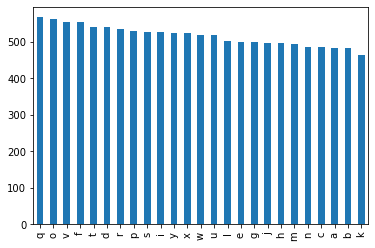

In [6]:
df['class'].value_counts().plot.bar()
plt.plot()

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove some class for research

In [8]:
#df = df[~df['class'].isin(['f'])]

# Copy to variable
Because the variable would refer to the original dataframe. We need to make sure that the original dataframe is intact

In [9]:
x = df.loc[:, df.columns != 'class'].copy()
y = df['class'].copy()

In [10]:
x

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
2787,-0.043678,0.144298,-0.001367,0.118090,0.025318,0.085541,0.045596,0.066051,0.067160,0.047238,...,-0.017887,-0.144298,-0.067944,0.001256,-0.079499,-0.052633,-0.078473,-0.092986,-0.072233,-0.127822
11587,0.058144,0.271704,0.003272,0.235769,-0.022701,0.156086,0.027381,0.102135,0.080952,0.060534,...,0.118567,-0.222641,0.115296,0.071051,0.081863,0.060264,0.052515,0.106296,0.036721,0.152769
11129,-0.026221,0.170065,0.004340,0.151180,0.012824,0.097461,-0.027577,0.059093,-0.062331,0.028613,...,-0.030867,0.081714,-0.064269,0.054473,-0.076406,0.051963,-0.062771,0.081565,-0.048935,0.097367
2955,0.109868,0.192643,0.050302,0.195982,-0.003602,0.180525,-0.052067,0.183374,-0.071848,0.165146,...,-0.011527,-0.195982,0.103197,0.035097,0.112950,-0.037540,0.118199,-0.094426,0.120244,-0.149020
6457,0.003025,0.158974,0.058134,0.118183,0.066401,0.011417,0.021600,-0.053538,-0.020266,-0.083357,...,0.004100,0.016583,-0.067907,-0.013207,-0.052015,-0.034669,-0.027278,0.027373,-0.015525,0.065080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,-0.034460,0.149961,0.020862,0.132600,0.073754,0.081525,0.093794,0.035602,0.065331,0.025165,...,-0.045106,-0.101498,-0.085299,-0.017150,-0.093794,-0.088834,-0.085004,-0.103615,-0.072546,-0.083003
12535,0.036781,0.182181,-0.036370,0.136243,-0.085414,0.064238,-0.111620,-0.002422,-0.132566,-0.051478,...,0.036750,0.069222,0.096775,0.010537,0.117327,-0.077013,0.125644,-0.130845,0.132566,-0.182181
8695,0.006074,0.189145,-0.029989,0.165556,-0.051109,0.101760,-0.021196,0.061260,0.014569,0.044120,...,-0.003548,0.073271,0.051109,0.053318,0.034980,0.032301,0.016328,0.069721,0.008688,0.098282
1178,0.005577,0.156307,-0.026087,0.137702,-0.044461,0.101220,-0.032928,0.069205,-0.010151,0.051110,...,0.009638,0.054616,0.035243,0.026143,0.044461,-0.008771,0.040231,0.017964,0.031624,0.045106


In [11]:
y

2787     f
11587    w
11129    v
2955     f
6457     m
        ..
2303     e
12535    y
8695     r
1178     d
3724     h
Name: class, Length: 12923, dtype: object

# Read class lists

In [13]:
classlist = []
filename = 'D:\\Libraries\\Project\\Python\\bangkit\\classlist.txt'
with open(filename) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        classlist.append(line.strip())
        line = fp.readline()
        cnt += 1
print(*classlist)

pe- ter- ber- me- di- se- ke- -an -nya -kan -i a b c d e f g h i j k l m n o p q r s t u v w x y z 0 1 2 3 4 5 6 7 8 9 saya Kamu Dia Selamat pagi sore malam Hai Terima kasih Makan Minum Air Sakit Benar Salah Pergi Tidur Bangun Ajar (buat belajar) Baca Jalan Tulis Lihat Doa Buku Main Beli Baju Hidup Suka Telepon Kenal Ayah Ibu Kakak Adik Saudara Jangan Susu Tinggi Pendek Saat Ingin maaf Asal Untuk Kita Kami dan atau Mereka umur hobi Jam Tanggal Tahun kerja


# Label encoding and decoding helper

In [14]:
def encode_label(data_array):
    for index, data in data_array.items():
        data_array[index] = classlist.index(data)
    return np.array(data_array)

def decode_label(data_array):
    for index, data in enumerate(data_array):
        data_array[index] = classlist[data]
    return np.array(data_array)

In [15]:
y = encode_label(y)

In [17]:
y[0]

16

# One hot encoding for labels

In [18]:
y = tf.keras.utils.to_categorical(y, dtype='float32')

In [19]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

# Train test split helper

In [20]:
def train_test_split(x,y,train_percent):
    x = np.array(x).astype(np.float32)
    y = np.array(y).astype(np.float32)
    length = len(y)
    split = int(length * (train_percent/100))
    return x[0:split],y[0:split],x[split:],y[split:]

In [62]:
x_train,y_train,x_test,y_test = train_test_split(x,y,80)

# Get number of classes based on the encoded class

In [63]:
# num_class = len(classlist)
num_class = len(y_train[0])

[]

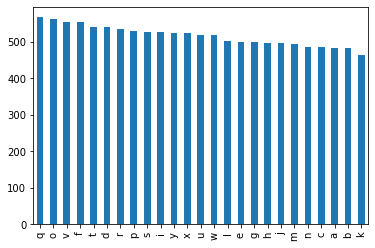

In [64]:
df['class'].value_counts().plot.bar()
plt.plot()

# Build sequential model

In [21]:
tf.keras.backend.clear_session()
# 42 = 21 landmarks * 2 (x and y)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(42,1)), 
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(num_class)
])

NameError: name 'num_class' is not defined

# Compile model

In [66]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                optimizer='adam',
                metrics=['acc'])

# Callback to save best model according to best val_acc

In [67]:
checkpoint_filepath = "../working/best_run2_epoch{epoch}.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [68]:
num_epoch = 100
batch_size = 256
verbose = 1

# Evaluate

In [69]:
history = model.fit(x=x_train,y=y_train,epochs=num_epoch,batch_size=batch_size,validation_data=(x_test,y_test), verbose=verbose)

Epoch 1/100
41/41 [==============================] - 0s 9ms/step - loss: 3.4082 - acc: 0.2512 - val_loss: 3.1611 - val_acc: 0.3513
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 2.8175 - acc: 0.4364 - val_loss: 2.4594 - val_acc: 0.5319
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 2.1400 - acc: 0.5919 - val_loss: 1.8650 - val_acc: 0.7211
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 1.6348 - acc: 0.7626 - val_loss: 1.4545 - val_acc: 0.8027
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 1.2887 - acc: 0.8074 - val_loss: 1.1731 - val_acc: 0.8720
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 1.0473 - acc: 0.8716 - val_loss: 0.9702 - val_acc: 0.8809
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.8740 - acc: 0.8882 - val_loss: 0.8265 - val_acc: 0.8990
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.7450 - a

# Save model

In [70]:
model.save('best.h5')

# Test prediction

In [24]:
prediction = model.predict_classes(np.array(x_train[:1]).astype(np.float32))
prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([11], dtype=int64)

In [25]:
prediction = np.argmax(tf.keras.utils.to_categorical(prediction), axis = 1)[0]
prediction

11

In [26]:
x_train[0], y_train[0]

(array([ 6.0565501e-02,  1.6469809e-01, -2.7848274e-02,  1.1718124e-01,
        -8.1218094e-02,  2.3503363e-02, -9.2865318e-02, -8.3658844e-02,
        -9.3911082e-02, -1.6469809e-01, -5.0614029e-02, -6.1340868e-02,
        -5.3317934e-02, -1.4779785e-01, -3.8688332e-02, -6.1840087e-02,
        -3.8520008e-02, -3.9240003e-02, -3.1355917e-03, -6.7572534e-02,
        -2.7942359e-03, -1.4334139e-01,  6.9002211e-03, -3.6277145e-02,
        -8.7946653e-05, -4.0533423e-02,  4.4508725e-02, -6.6564098e-02,
         4.4652075e-02, -1.4053971e-01,  4.5145184e-02, -4.0652275e-02,
         4.1062385e-02, -3.7139118e-02,  9.3911082e-02, -6.3033313e-02,
         8.8246435e-02, -1.2895179e-01,  8.1502885e-02, -5.9864491e-02,
         7.9411894e-02, -4.4073403e-02], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       dtype=float32))

In [27]:
print(decode_label([prediction]))

['a']
